In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
np.set_printoptions(precision=4, suppress=True)

## Lecture 10: Multiple Regression


In [2]:
df = pd.read_csv('dataset_Facebook.csv',delimiter=';')

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
x = df.iloc[:,2:15].fillna(0).as_matrix()
y = df['like'].fillna(0).as_matrix()

In [5]:
df.iloc[:,2:15].head()

,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post
0,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119
1,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108
2,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132
3,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386
4,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396


## Training Linear Models

We will take a look at how to use sklearn and statsmodel for training linear models

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression(normalize=False)
reg.fit(x,y)
print "R-squared=", reg.score(x,y)
print "Coef=", reg.coef_
print "Int=", reg.intercept_

R-squared= 0.981125861114
Coef= [ 0.8287 -3.3661 -0.4599 -0.5577 -1.6111 -0.001   0.0003  1.2316 -1.2248
  0.0049 -0.0002 -0.0007  0.0386]
Int= 32.9895475675


/Users/tow02/Desktop/iccs413/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


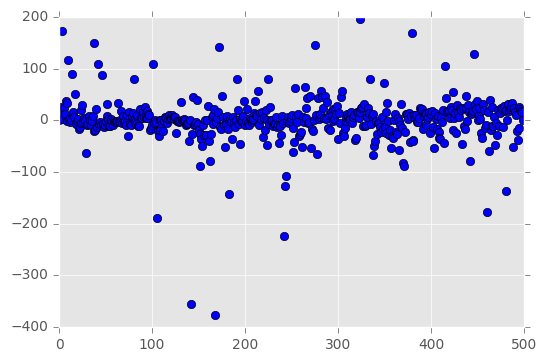

In [7]:
plt.plot(range(x.shape[0]), reg.predict(x) - y, 'ob')

In [8]:
import statsmodels.api as sm
ols = sm.OLS(y, sm.add_constant(x))
ols_result = ols.fit()
print ols_result.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1943.
Date:                Fri, 10 Feb 2017   Prob (F-statistic):               0.00
Time:                        16:57:59   Log-Likelihood:                -2605.6
No. Observations:                 500   AIC:                             5239.
Df Residuals:                     486   BIC:                             5298.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         32.9895     10.862      3.037      0.0

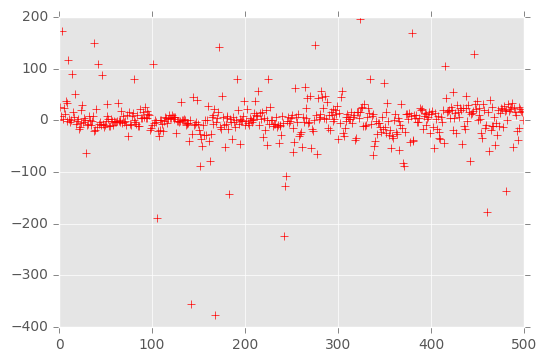

In [9]:
error = [ np.dot(ols_result.params[1:],x[i,:]) + ols_result.params[0] - y[i] for i in range(x.shape[0]) ]
plt.plot(range(x.shape[0]), error, '+r')

## Estimating Standard Error of Regression Coefficients

We can take the bootstrapping approach to estimating the standard errors of our regression coefficients.  We repeatedly take a bootstrap sample of our data and estimate the coefficients based on that sample. If the coefficient corresponding to one of the independent variables doesn’t vary much across samples, then we can be confident that our estimate is relatively tight. If the coefficient varies greatly across samples, then we can’t be at all confident in our estimate.

In [10]:
coefs = []
n = x.shape[0]
reg = linear_model.LinearRegression()
for i in range(2000):
    sample = np.random.choice(xrange(n),n)
    sx = x[sample,:]
    sy = y[sample]
    reg.fit(sx, sy)
    coefs.append(reg.coef_)
    
all_coefs = np.vstack(coefs)
print np.mean(all_coefs, axis=0)
print np.std(all_coefs, axis=0)

[ 1.488  -2.6676 -0.4025 -0.5469 -1.8195 -0.0012  0.0004  1.2289 -1.2041
  0.0053 -0.0002 -0.0003  0.0146]
[ 2.825   1.1079  0.8521  0.415   4.4238  0.0007  0.0002  0.0369  0.0409
  0.0023  0.0004  0.0017  0.041 ]


In [11]:
nx = x[:, ols_result.pvalues[1:] < 0.1]

In [12]:
ols2 = sm.OLS(y, sm.add_constant(nx))
ols_result2 = ols2.fit()
print ols_result2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     3560.
Date:                Fri, 10 Feb 2017   Prob (F-statistic):               0.00
Time:                        16:58:01   Log-Likelihood:                -2611.9
No. Observations:                 500   AIC:                             5240.
Df Residuals:                     492   BIC:                             5274.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         24.0592      5.444      4.420      0.0

## Regularization

Regularization is an approach in which we add to the error term a penalty that gets larger as coefficient vector gets larger. We then minimize the combined error and penalty. The more importance we place on the penalty term, the more we discourage large coefficients. Read more here: http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression and http://scikit-learn.org/stable/modules/linear_model.html#lasso
 

In [13]:
regridge = linear_model.Ridge(alpha = 0.999)
regridge.fit(x[:,[0,1,5]], y) 
print "R-squared=", regridge.score(x[:,[0,1,5]],y)
print "Coef=", regridge.coef_
print "Int=", regridge.intercept_

R-squared= 0.353087885266
Coef= [ 85.413   11.1142   0.0084]
Int= -177.612146471


In [14]:
regridge = linear_model.Ridge(alpha = 1e-4)
regridge.fit(x[:,[0,1,5]], y) 
print "R-squared=", regridge.score(x[:,[0,1,5]],y)
print "Coef=", regridge.coef_
print "Int=", regridge.intercept_

R-squared= 0.353088290966
Coef= [ 85.6593  11.1254   0.0084]
Int= -178.174474372


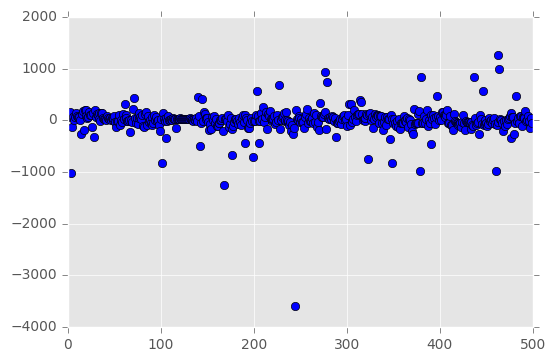

In [15]:
plt.plot(range(x.shape[0]), regridge.predict(x[:,[0,1,5]]) - y, 'ob')

In [16]:
df = pd.read_csv('msft.csv')

In [17]:
df.head()

,Date,Open,High,Low,Close,Volume
0,8-Feb-17,63.57,63.81,63.22,63.34,18096358
1,7-Feb-17,63.74,63.78,63.23,63.43,20277226
2,6-Feb-17,63.50,63.65,63.14,63.64,19796360
3,3-Feb-17,63.50,63.70,63.07,63.68,30301759
4,2-Feb-17,63.25,63.41,62.75,63.17,45827013


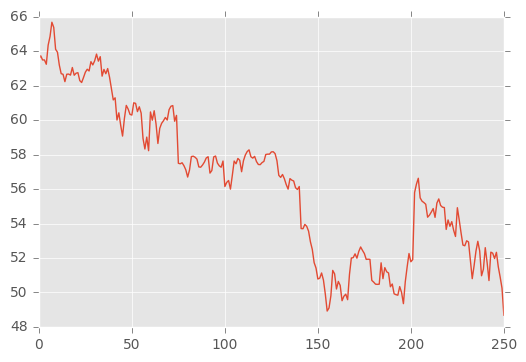

In [18]:
df['Open'].plot()

In [19]:
x = []

for i in range(len(df)-10):
    x.append(df['Open'][i:i+10].as_matrix())

data = np.array(x)
print data.shape
y = data[150:,0]
x = data[150:,1:]

tx = data[150:,0]
ty = data[150:,1:]



(241, 10)


In [20]:
regridge = linear_model.Ridge(alpha = 0.999)
regridge.fit(x, y) 
print "R-squared=", regridge.score(x,y)
print "Coef=", regridge.coef_
print "Int=", regridge.intercept_

R-squared= 0.857994066596
Coef= [ 0.9842 -0.1763  0.1084  0.128  -0.0478 -0.0434 -0.1779  0.0924  0.0566]
Int= 3.94454863542


In [22]:
plt.plot(range(tx.shape[0]), regridge.predict(tx), '-r')
plt.plot(range(tx.shape[0]), ty, '-b')

## Note

standard errors of regression coefficients $ \hat{\sigma_i} $

the fluctuation of a coefficient

$ \hat{t_i} = \frac{\hat{\beta_i}}{ \hat{\sigma_i}} $ 


High $ \hat{\sigma_i} $ means
- the coefficient is somewhat random

- Is the coefficient zero?
    - $ H_0 $ the coefficient is zero i.e. $ \beta_i = 0 $

### Estimate standard error of regression coefficients

$ \hat{t_i} = \frac{\hat{\beta_i}}{\hat{\sigma_i}} $